In [2]:
import pandas as pd

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('data/ionosphere_data_kaggle.csv')

In [4]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [5]:
print(df.isnull().sum())

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64


In [6]:
df['label'][df['label'] == 'b'] =0
df['label'][df['label'] == 'g'] =1

/home/edge2992/research/tutorial/03_learning/learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/edge2992/research/tutorial/03_learning/learning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
import numpy as np
df.describe()
df['label'].unique()
df['label'] = df['label'].astype(np.int64)
df['label'].dtype

dtype('int64')

In [8]:
X = df.drop(["label"], axis=1)
Y = df["label"]

In [9]:
X.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


# 3-1. Scikit-learnを使った学習の実行 
Pythonのscikit-learnのSVMでionosphereデータの10-fold Cross Validationを実施せよ．

予測性能としてprecision, recall, MCC, ROC曲線のAUC値 (AUROC)，F-scoreを求めよ．カーネルはRBFカーネルとし，パラメータは適宜定めよ．



| | |
| ---- | ---- |
| precision | 適合率のこと。予測を正と判断した中で、答えも正のもの。計算式は下記を参照。|
| recall | 	再現率のこと。答えが正の中で、予測が正とされたもの。計算式は下記を参照。|
| MCC | 2値分類モデルの精度をみる指標 マシューズ相関係数 |
| ROC曲線のAUC値 (AUROC) |ROC曲線の面積|
| F-score | 精度 (Precision) と検出率 (Recall) をバランス良く持ち合わせているかを示す指標 |

Precision = TP / (TP + FP)

Recall = TPR = Sensitivity = TP / (TP + FN)
$$
    MCC = \sqrt{\frac{\chi}{n}}
$$
\[MCC = sqrt{}{} \]

In [10]:
# from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

#clf = LinearSVC().fit(X_train, y_train)
model = SVC(kernel='rbf', probability=True).fit(X_train, y_train)

print('Ionosphere dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Ionosphere dataset
Accuracy of Linear SVC classifier on training set: 0.95
Accuracy of Linear SVC classifier on test set: 0.99


/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import roc_curve, auc

def eval_model(y_test, y_pred, y_score):
    print('precision score of test set: {:.5f}'.format(precision_score(y_test, y_pred)))
    print('recall score of test set: {:.5f}'.format(recall_score(y_test, y_pred)))
    print('auc score of test set: {:.5f}'.format(auc(fpr, tpr)))
    print('matthews_corrcoef score of test set: {:.5f}'.format(matthews_corrcoef(y_test, y_pred)))
    print('f score of test set: {:.5f}'.format(f1_score(y_test, y_pred)))
    

In [12]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

eval_model(y_test, y_pred, y_score)
on score of tes


precision score of test set: 0.98039
recall score of test set: 1.00000
auc score of test set: 0.99789
matthews_corrcoef score of test set: 0.97703
f score of test set: 0.99010


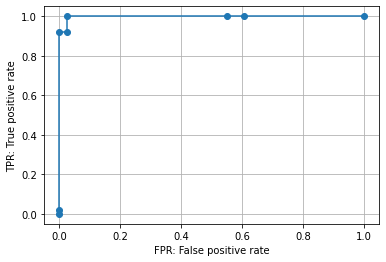

In [13]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
# plt.savefig('data/dst/sklearn_roc_curve.png')

## 交差検証する

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
svm = SVC(kernel='rbf', probability=True)

scores = cross_val_score(svm, X=X, y=Y, cv=kf)

In [15]:
from sklearn.model_selection import cross_val_predict

y_predd = cross_val_predict(svm, X, Y, cv=kf)
y_score = cross_val_predict(svm, X, Y, cv=kf, method='predict_proba')

eval_model(Y, y_predd, y_score)

precision score of test set: 0.91667
recall score of test set: 0.97778
auc score of test set: 0.99789
matthews_corrcoef score of test set: 0.84493
f score of test set: 0.94624


# 3-2. ハイパーパラメータ探索 
ionosphereデータにおいて，より良いRBFカーネルパラメータγとコストパラメータCの値を探索せよ．評価方法は10-fold Cross Validationとし，評価基準はAUROCとF-scoreの2通りを試すこと．

### Grid search

In [129]:
from sklearn.model_selection import GridSearchCV
from multiprocessing import cpu_count


def grid(params, model):
#     kf = KFold(n_splits=10, shuffle=True, random_state=42)

    gs = GridSearchCV
    gs = GridSearchCV(estimator=model, param_grid=params, cv=10, n_jobs=cpu_count())

    gs.fit(X, Y)
    print(gs.best_params_)
    
    # 評価
    y_pred_gs = gs.predict(X)
    confusion_matrix(Y, y_pred_gs)

    y_score_gs = gs.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y, y_score_gs)

    eval_model(Y, y_pred_gs, y_score_gs)
    
    return gs

In [130]:
candidate_params = {
    'C': [1, 10, 100, 1000],
    'gamma': [00.1, 0.1, 1, 10],
}
    
svm = SVC(kernel='rbf', probability=True)

gs = grid(candidate_params, svm)

{'C': 10, 'gamma': 0.1}
precision score of test set: 0.98678
recall score of test set: 0.99556
auc score of test set: 1.00000
matthews_corrcoef score of test set: 0.97523
f score of test set: 0.99115


In [131]:
params2 = {
    'C': list(range(50, 150, 20)),
    'gamma': [i /10 for i in range(1, 6, 1)],
}

svm = SVC(kernel='rbf', probability=True)
gs2 = grid(params2, svm)

{'C': 50, 'gamma': 0.3}
precision score of test set: 1.00000
recall score of test set: 1.00000
auc score of test set: 1.00000
matthews_corrcoef score of test set: 1.00000
f score of test set: 1.00000


おそらく分割しすぎ

## optuna

In [99]:
import optuna
from sklearn.metrics import roc_curve, auc

def objective(X, y, ev, trial):
    params = {
        'C': trial.suggest_loguniform('C', 1e+0, 1e+3),
        'gamma': trial.suggest_loguniform('gamma', 1e-2, 1e+1),
    }
    model_opt = SVC(kernel='rbf',**params, probability=True)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    if ev == 'f':     
        y_pred = cross_val_predict(model_opt, X, y, cv=kf)
        return f1_score(y, y_pred)
    elif ev == 'auc':
        y_score_op = cross_val_predict(model_opt, X, y, cv=kf, method='predict_proba')[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_score_op)
        return auc(fpr, tpr)
        

In [102]:
from functools import partial

study_f = optuna.create_study(direction='maximize')
f = partial(objective, X, Y, 'f')
study_f.optimize(f, n_trials=10)
study_f.best_params

[I 2020-04-05 11:16:30,815] Finished trial#0 with value: 0.9295774647887323 with parameters: {'C': 34.98872716255566, 'gamma': 1.2706791635022787}. Best is trial#0 with value: 0.9295774647887323.
[I 2020-04-05 11:16:30,965] Finished trial#1 with value: 0.9393939393939394 with parameters: {'C': 324.89255942895335, 'gamma': 0.012031198753460525}. Best is trial#1 with value: 0.9393939393939394.
[I 2020-04-05 11:16:31,218] Finished trial#2 with value: 0.9270588235294117 with parameters: {'C': 1.5566256605318294, 'gamma': 1.2687058236490643}. Best is trial#1 with value: 0.9393939393939394.
[I 2020-04-05 11:16:31,360] Finished trial#3 with value: 0.9567099567099567 with parameters: {'C': 9.505673894884236, 'gamma': 0.13360300548928836}. Best is trial#3 with value: 0.9567099567099567.
[I 2020-04-05 11:16:31,507] Finished trial#4 with value: 0.9393939393939394 with parameters: {'C': 263.98910152538554, 'gamma': 0.015671689141027862}. Best is trial#3 with value: 0.9567099567099567.
[I 2020-04-0

{'C': 9.505673894884236, 'gamma': 0.13360300548928836}

In [104]:
study_auc = optuna.create_study(direction='maximize')
f = partial(objective, X, Y, 'auc')
study_auc.optimize(f, n_trials=10)
study_auc.best_params

[I 2020-04-05 11:18:59,391] Finished trial#0 with value: 0.979400352733686 with parameters: {'C': 22.826508444614397, 'gamma': 0.022825079724530458}. Best is trial#0 with value: 0.979400352733686.
[I 2020-04-05 11:18:59,531] Finished trial#1 with value: 0.9550617283950618 with parameters: {'C': 183.61979224550322, 'gamma': 0.018706038556280304}. Best is trial#0 with value: 0.979400352733686.
[I 2020-04-05 11:18:59,669] Finished trial#2 with value: 0.977089947089947 with parameters: {'C': 3.7786155557976686, 'gamma': 0.02976568308331559}. Best is trial#0 with value: 0.979400352733686.
[I 2020-04-05 11:18:59,814] Finished trial#3 with value: 0.9710758377425044 with parameters: {'C': 4.992979023724102, 'gamma': 0.015186731161614921}. Best is trial#0 with value: 0.979400352733686.
[I 2020-04-05 11:18:59,946] Finished trial#4 with value: 0.9772310405643739 with parameters: {'C': 34.5934659217714, 'gamma': 0.043689887145480576}. Best is trial#0 with value: 0.979400352733686.
[I 2020-04-05 11

{'C': 47.61311835357883, 'gamma': 0.47606582535060527}